In [ ]:
pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.2 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import login
from google.colab import userdata

login(token=userdata.get('hagging_face'))

In [ ]:
from datasets import load_dataset

datasets = load_dataset("atlasia/DODa-audio-dataset")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.36k [00:00<?, ?B/s]

train-00000-of-00005.parquet:   0%|          | 0.00/333M [00:00<?, ?B/s]

train-00001-of-00005.parquet:   0%|          | 0.00/279M [00:00<?, ?B/s]

train-00002-of-00005.parquet:   0%|          | 0.00/237M [00:00<?, ?B/s]

train-00003-of-00005.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00004-of-00005.parquet:   0%|          | 0.00/210M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/12743 [00:00<?, ? examples/s]

In [ ]:
print(datasets)

DatasetDict({
    train: Dataset({
        features: ['audio', 'darija_Latn', 'darija_Arab_new', 'english', 'darija_Arab_old'],
        num_rows: 12743
    })
})


In [ ]:
print(datasets["train"][0])

{'audio': {'path': '0.wav', 'array': array([ 0.        ,  0.        ,  0.        , ..., -0.0017395 ,
       -0.00152588, -0.00091553]), 'sampling_rate': 16000}, 'darija_Latn': 'homa mkhbbyin chi haja, ana mti99en!', 'darija_Arab_new': 'هوما مخبيين شي حاجة انا متيقن', 'english': "They're hiding something, I'm sure!", 'darija_Arab_old': 'هوما مخبّيين شي حاجة, أنا متيقّن!'}


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def preprocess_audio(example, target_sr=16000):
    audio_array = example["audio"]["array"]
    sr = example["audio"]["sampling_rate"]

    # Convertir en mono et normaliser le volume
    audio_array = librosa.to_mono(audio_array)
    audio_array = librosa.util.normalize(audio_array)

    # Changer la fréquence d'échantillonnage
    if sr != target_sr:
        audio_array = librosa.resample(audio_array, orig_sr=sr, target_sr=target_sr)

    # Extraire MFCCs
    mfccs = librosa.feature.mfcc(y=audio_array, sr=target_sr, n_mfcc=13)

    return {"audio": audio_array, "sr": target_sr, "mfccs": mfccs}



In [ ]:
# Appliquer le prétraitement sur un échantillon
sample = preprocess_audio(datasets["train"][0])


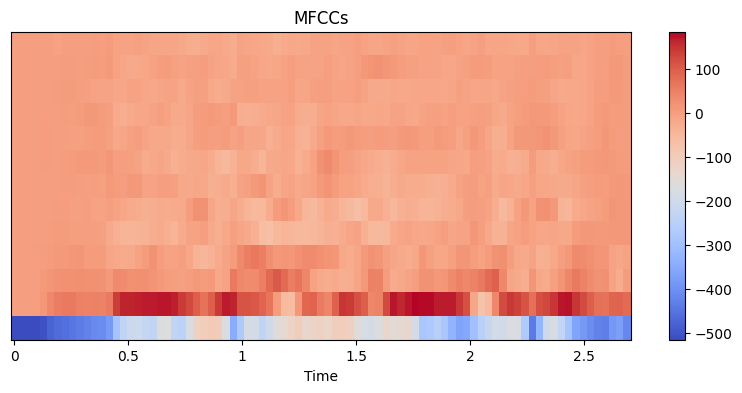

In [ ]:
# Afficher les MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(sample["mfccs"], x_axis="time", sr=sample["sr"])
plt.colorbar()
plt.title("MFCCs")
plt.show()

In [ ]:
# Charger un exemple audio
sample = datasets["train"][0]["audio"]  # Premier fichier
y, sr = sample["array"], sample["sampling_rate"]


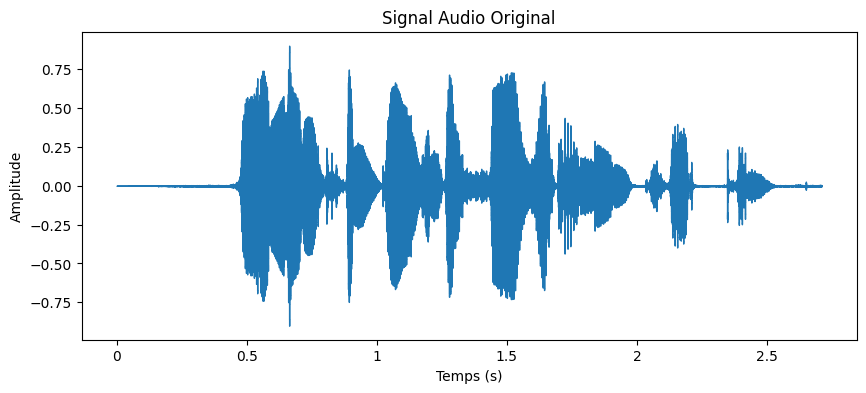

In [ ]:
# Afficher le signal original
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Signal Audio Original")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
def add_noise_audio(y, noise_level=0.02):
    """Ajoute du bruit aléatoire au signal audio"""
    noise = np.random.normal(0, noise_level, y.shape)
    return y + noise


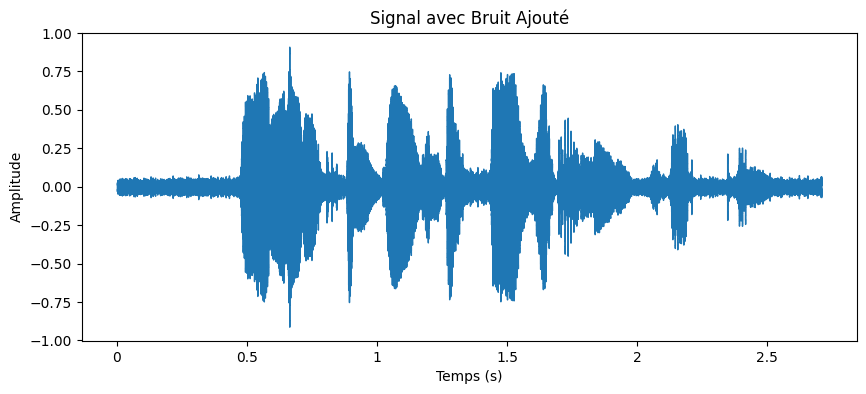

In [ ]:
y_noisy = add_noise_audio(y)

# Affichage du signal bruité
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_noisy, sr=sr)
plt.title("Signal avec Bruit Ajouté")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# Écouter l’audio original
import IPython.display as ipd
ipd.Audio(y_noisy, rate=16000)


In [ ]:
# Écouter l’audio modifié
ipd.Audio(y_noisy, rate=16000)

In [ ]:
def shift_mfcc_audio(y, sr, shift=2):
    """Décale les MFCCs pour modifier le timbre vocal"""
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.roll(mfccs, shift, axis=0)


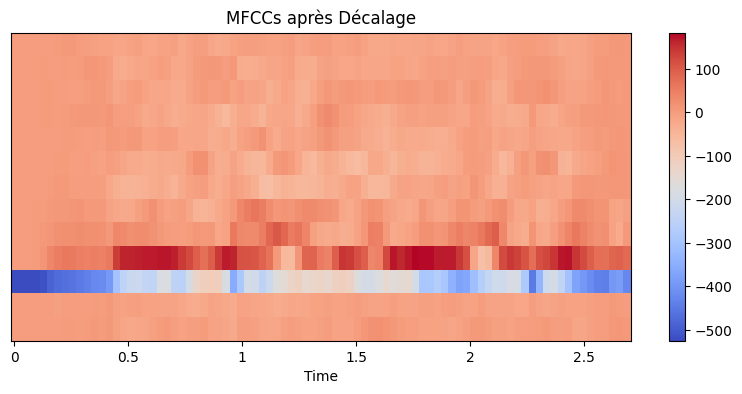

In [ ]:
mfcc_shifted = shift_mfcc_audio(y, sr)

# Afficher les MFCCs avant et après transformation
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_shifted, sr=sr, x_axis="time")
plt.title("MFCCs après Décalage")
plt.colorbar()
plt.show()

In [ ]:
def change_pitch_audio(y, sr, n_steps=6):
    """Modifie la hauteur de la voix (pitch shifting)"""
    return librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)



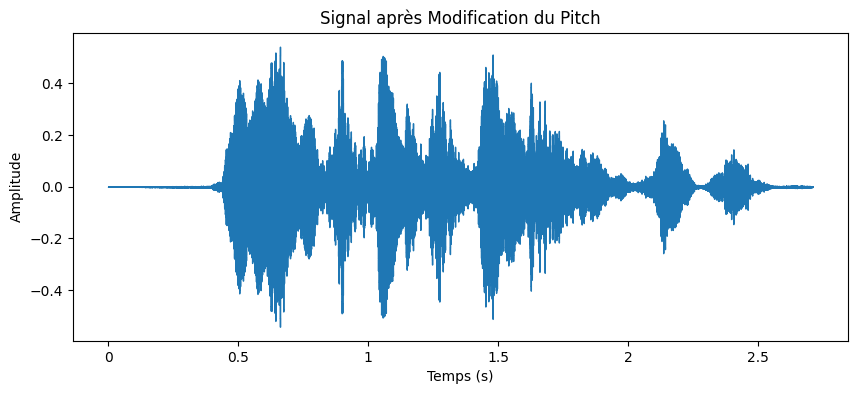

In [ ]:
y_pitch = change_pitch_audio(y, sr)

# Affichage du signal après changement de pitch
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_pitch, sr=sr)
plt.title("Signal après Modification du Pitch")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# Écouter l’audio modifié
ipd.Audio(y_pitch, rate=16000)

In [ ]:
import librosa.display
from scipy.spatial.distance import cosine
import soundfile as sf



In [ ]:

# Fonction pour afficher le spectrogramme
def plot_spectrogram(y, sr, title):
    plt.figure(figsize=(10, 4))
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, sr=sr, x_axis="time", y_axis="mel")
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.show()


In [ ]:
# Étape 1 : Modification du Pitch
y_pitch_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)  # Augmentation du pitch de 2 demi-tons




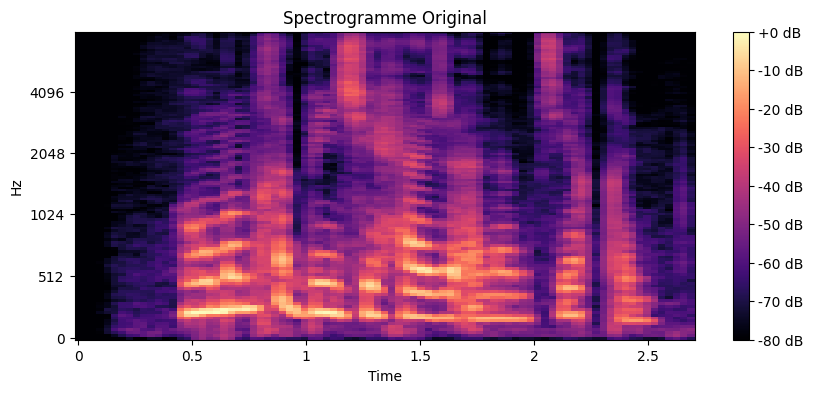

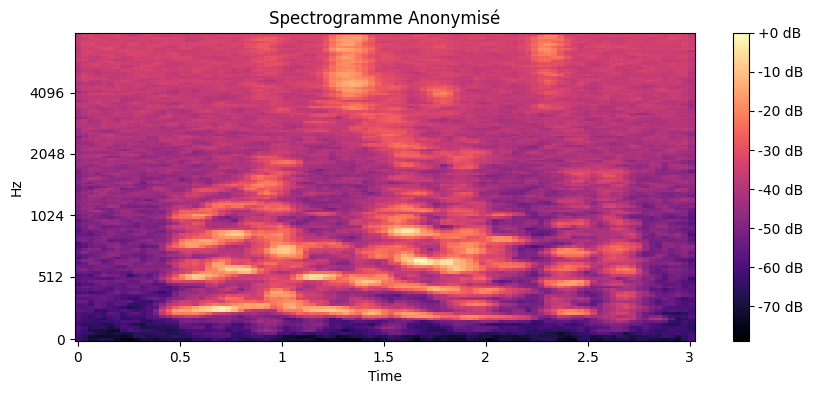

In [ ]:
# Étape 2 : Transformation des Formants (approximation via Time-Stretching)
y_time_stretched = librosa.effects.time_stretch(y_pitch_shifted, rate=0.9)  # Ralentissement de 10%

# Étape 3 : Ajout de Bruit de Fond
noise = np.random.normal(0, 0.005, y_time_stretched.shape)
y_noisy = y_time_stretched + noise

# Étape 4 : Filtrage Fréquentiel (Passe-Haut à 300Hz)
y_filtered = librosa.effects.preemphasis(y_noisy)

# Sauvegarde du fichier audio transformé
#output_path = "/mnt/data/anonymized_audio.wav"
#sf.write(output_path, y_filtered, sr)

# Affichage des spectrogrammes avant et après anonymisation
plot_spectrogram(y, sr, "Spectrogramme Original")
plot_spectrogram(y_filtered, sr, "Spectrogramme Anonymisé")

# Calcul de la distance cosine entre les MFCCs de l'original et l'anonymisé
mfcc_original = librosa.feature.mfcc(y=y, sr=sr)
mfcc_anonymized = librosa.feature.mfcc(y=y_filtered, sr=sr)
mfcc_distance = cosine(mfcc_original.mean(axis=1), mfcc_anonymized.mean(axis=1))



In [ ]:
ipd.Audio(y, rate=16000)


In [ ]:
ipd.Audio(y_pitch_shifted, rate=16000)


In [ ]:
ipd.Audio(y_time_stretched, rate=16000)


In [ ]:
ipd.Audio(y_noisy, rate=16000)


In [ ]:
ipd.Audio(y_filtered, rate=16000)


In [ ]:
from datasets import load_dataset

# Charger la dataset complète
dataset = load_dataset("atlasia/DODa-audio-dataset")
train_dataset = dataset["train"]

# Créer une liste d'indices : 0, 100, 200, ...
selected_indices = list(range(0, len(train_dataset), 100))

# Extraire le sous-ensemble
subset_dataset = train_dataset.select(selected_indices)

# Afficher quelques informations
print("Nombre total d'audios dans la dataset originale :", len(train_dataset))
print("Nombre d'audios dans le subset :", len(subset_dataset))


Nombre total d'audios dans la dataset originale : 12743
Nombre d'audios dans le subset : 128


In [ ]:
print(subset_dataset[0]["audio"])

{'path': '0.wav', 'array': array([ 0.        ,  0.        ,  0.        , ..., -0.0017395 ,
       -0.00152588, -0.00091553]), 'sampling_rate': 16000}


In [ ]:
ipd.Audio(y_time_stretched, rate=16000)

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve

def compute_eer(y_true, scores):
    """ Calcule l'Equal Error Rate (EER) """
    fpr, tpr, thresholds = roc_curve(y_true, scores)
    fnr = 1 - tpr
    eer_threshold = thresholds[np.nanargmin(np.abs(fpr - fnr))]
    eer = fpr[np.nanargmin(np.abs(fpr - fnr))]
    return eer, eer_threshold

# Exemple : Similarités entre audios originaux et anonymisés
y_true = np.concatenate([np.ones(50), np.zeros(50)])  # 50 paires mêmes locuteurs, 50 différentes
scores = np.random.rand(100)  # À remplacer par des vraies similarités cosines

eer, threshold = compute_eer(y_true, scores)
print(f"EER: {eer:.4f} à un seuil de {threshold:.4f}")


In [ ]:
mfcc_distance

0.12162603963594121

In [ ]:
import numpy as np

def add_noise(mfccs, noise_level=0.2):
    """Ajoute un bruit aléatoire aux MFCCs pour perturber l’identité vocale"""
    noise = np.random.normal(0, noise_level, mfccs.shape)
    return mfccs + noise


In [ ]:
def shift_mfcc(mfccs, shift=2):
    """Décale les coefficients MFCCs vers le haut ou le bas pour modifier le timbre vocal"""
    return np.roll(mfccs, shift, axis=0)


In [ ]:
import librosa

def change_pitch(y, sr, n_steps=4):
    """Modifie la hauteur de la voix (pitch shifting)"""
    return librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)


In [ ]:
import IPython.display as ipd

In [ ]:
# Écouter l’audio original
ipd.Audio(original_audio, rate=16000)

# Écouter l’audio modifié
ipd.Audio(modified_audio, rate=16000)


In [ ]:
ds = load_dataset("BounharAbdelaziz/Moroccan-Darija-Youtube-Commons-Eval")

In [ ]:
print(ds)